# Import old year sentiment data for FB

In [1]:

# Import libraries
from urllib.request import urlopen, Request
import nltk
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

web_archive = 'https://web.archive.org/web/'
finviz_URL = '/https://finviz.com/quote.ashx?t='

archive_index = [
    20211104023424,
    20211028001302,
    20211020235016,
    20211009052841,
    20211008030412,
    20211007034849,
    20211004210644,
    20211001050149,
    20210927201702,
    20210922075625,
    20210916031424,
    20210908042108,
    20210826045830,
    20210820070250,
    20210814053838,
    20210805043147,
    20210729071306,
    20210723055318,
    20210714071539,
    20210630060914,
    20210624100120,
    20210617065207,
    20210609052257,
    20210603061741,
    20210526084117,
    20210518044259,
    20210514045959,
    20210507054929,
    20210503144838,
    20210430050232,
    20210427053450,
    20210421060733,
    20210414051558,
    20210407050752,
    20210331052651,
    20210325052139,
    20210323052201,
    20210316144756,
    20210309132938,
    20210226004127,
    20210223120416,
    20210216114025,
    20210209112439,
    20210203105409,
    20210129100447,
    20210126075546,
    20210119073155,
    20210111051023,
    
]


news_tables = {}
ticker = 'FB'
j=0

for index in archive_index:
    j = j+1
    print('Uploading file %f....' % j)
    print(len(news_tables))
    url = web_archive + str(index) + finviz_URL + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    html = BeautifulSoup(response)
    news_table = html.find(id='news-table')
    news_tables[j] = news_table



Uploading file 1.000000....
0
Uploading file 2.000000....
1
Uploading file 3.000000....
2
Uploading file 4.000000....
3
Uploading file 5.000000....
4
Uploading file 6.000000....
5
Uploading file 7.000000....
6
Uploading file 8.000000....
7
Uploading file 9.000000....
8
Uploading file 10.000000....
9
Uploading file 11.000000....
10
Uploading file 12.000000....
11
Uploading file 13.000000....
12
Uploading file 14.000000....
13
Uploading file 15.000000....
14
Uploading file 16.000000....
15
Uploading file 17.000000....
16
Uploading file 18.000000....
17
Uploading file 19.000000....
18
Uploading file 20.000000....
19
Uploading file 21.000000....
20
Uploading file 22.000000....
21
Uploading file 23.000000....
22
Uploading file 24.000000....
23
Uploading file 25.000000....
24
Uploading file 26.000000....
25
Uploading file 27.000000....
26
Uploading file 28.000000....
27
Uploading file 29.000000....
28
Uploading file 30.000000....
29
Uploading file 31.000000....
30
Uploading file 32.000000...

In [2]:
parsed_news_FB = []

for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        text = x.a.get_text() 
        date_scrape = x.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]

        else:
            date = date_scrape[0]
            time = date_scrape[1]

        page_index = str(file_name)
        parsed_news_FB.append([page_index, date, time, text])
        
parsed_news_FB[1]

['1',
 'Nov-03-21',
 '06:07PM',
 'IMPORTANT REMINDER: FACEBOOK, INC. (NASDAQ: FB) SHAREHOLDER CLASS ACTION DEADLINE- Bernstein Liebhard LLP Reminds Investors of the Deadline to File a Lead Plaintiff Motion in a Securities Class Action Lawsuit Against Facebook, Inc.']

In [26]:

vader = SentimentIntensityAnalyzer()
columns = ['page_index', 'date', 'time', 'headline']
parsed_and_scored_news_FB = pd.DataFrame(parsed_news_FB, columns=columns)
scores_FB = parsed_and_scored_news_FB['headline'].apply(vader.polarity_scores).tolist()
scores_df_FB = pd.DataFrame(scores_FB)

parsed_and_scored_news_FB = parsed_and_scored_news_FB.join(scores_df_FB, rsuffix='_right')
parsed_and_scored_news_FB['date'] = pd.to_datetime(parsed_and_scored_news_FB.date).dt.date
parsed_and_scored_news_FB.drop_duplicates('headline', inplace = True)
parsed_and_scored_news_FB.tail(30)



daily_count_FB = parsed_and_scored_news_FB.value_counts('date')
FBSentimentData = parsed_and_scored_news_FB.drop(['time'],axis=1).groupby('date').mean()
print(daily_count_FB)

FBSentimentData.set_index(pd.to_datetime(FBSentimentData.index, format = '%Y-%m-%d'),inplace=True)
FBSentimentData.sort_values(by='date', axis=0,ascending=False,inplace=True)
FBSentimentData = pd.concat((FBSentimentData,daily_count_FB), axis=1, join='inner')
FBSentimentData['Daily References'] = FBSentimentData[0]
FBSentimentData.drop(0,axis=1,inplace=True)
FBSentimentData

date
2021-10-05    64
2021-10-26    58
2021-10-04    51
2021-01-28    48
2021-02-18    43
              ..
2021-04-17     1
2021-08-29     1
2021-09-04     1
2021-09-06     1
2021-08-22     1
Length: 282, dtype: int64


,neg,neu,pos,compound,Daily References
date,,,,,
2021-11-03,0.037000,0.893464,0.069536,0.081789,28
2021-11-02,0.035733,0.880600,0.083667,0.124787,30
2021-11-01,0.044485,0.895424,0.060091,0.047182,33
2021-10-27,0.074533,0.845800,0.079700,0.009707,30
2021-10-26,0.028828,0.871310,0.099845,0.124543,58
...,...,...,...,...,...
2021-01-10,0.112889,0.799333,0.087778,-0.073978,9
2021-01-09,0.137500,0.780500,0.082000,-0.155483,6
2021-01-08,0.072846,0.833654,0.093500,0.022354,26


In [27]:
import datetime
from datetime import date
from pandas_datareader.data import DataReader
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtrader as bt
import talib
pd.options.mode.chained_assignment = None

In [28]:
### Import data

def yahooImport(ticker,start,end,period):
    yahoo_financials = YahooFinancials(ticker)
    data = pd.DataFrame(yahoo_financials.get_historical_price_data(start, end, period)[ticker]['prices'])
    data['formatted_date'] = pd.to_datetime(data['formatted_date']).dt.date
    data = data.set_index('formatted_date').drop(columns=['date','adjclose'])
    print(data.shape)
    return data


tick = 'FB'
date1 = '2021-1-6'
date2 = '2021-11-08'
data = yahooImport(tick,date1,date2,'daily')
print(data.index.dtype)

print(data.head())

(212, 5)
object
                      high         low        open       close    volume
formatted_date                                                          
2021-01-06      267.750000  260.010010  262.000000  263.309998  24354100
2021-01-07      271.609985  264.779999  265.899994  268.739990  15789800
2021-01-08      268.950012  263.179993  268.309998  267.570007  18528300
2021-01-11      263.470001  255.899994  260.480011  256.839996  30412300
2021-01-12      259.720001  250.300003  256.630005  251.089996  26383500


In [33]:
FB = pd.concat((data,FBSentimentData), axis=1, join='inner')
FB.to_csv('FB.csv')
FB

,high,low,open,close,volume,neg,neu,pos,compound,Daily References
2021-01-06,267.750000,260.010010,262.000000,263.309998,24354100,0.127200,0.805850,0.066950,-0.138900,20
2021-01-07,271.609985,264.779999,265.899994,268.739990,15789800,0.115611,0.852944,0.031444,-0.152189,36
2021-01-08,268.950012,263.179993,268.309998,267.570007,18528300,0.072846,0.833654,0.093500,0.022354,26
2021-01-12,259.720001,250.300003,256.630005,251.089996,26383500,0.039714,0.908000,0.052286,0.027367,21
2021-01-13,253.949997,249.199997,251.550003,251.639999,19528900,0.103579,0.808368,0.088053,-0.023521,19
...,...,...,...,...,...,...,...,...,...,...
2021-10-26,330.209991,309.600006,328.260010,315.809998,65654000,0.028828,0.871310,0.099845,0.124543,58
2021-10-27,319.250000,312.059998,314.190002,312.220001,29971800,0.074533,0.845800,0.079700,0.009707,30
2021-11-01,333.450012,326.000000,326.040009,329.980011,31518900,0.044485,0.895424,0.060091,0.047182,33
2021-11-02,334.790009,323.799988,331.380005,328.079987,28353000,0.035733,0.880600,0.083667,0.124787,30


In [30]:
FB['SMA_25'] = talib.SMA(data['close'],25)
FB['EMA_25'] = talib.EMA(data['close'],25)
FB

,high,low,open,close,volume,neg,neu,pos,compound,Daily References,SMA_25,EMA_25
2021-01-06,267.750000,260.010010,262.000000,263.309998,24354100,0.127200,0.805850,0.066950,-0.138900,20,NaN,NaN
2021-01-07,271.609985,264.779999,265.899994,268.739990,15789800,0.115611,0.852944,0.031444,-0.152189,36,NaN,NaN
2021-01-08,268.950012,263.179993,268.309998,267.570007,18528300,0.072846,0.833654,0.093500,0.022354,26,NaN,NaN
2021-01-12,259.720001,250.300003,256.630005,251.089996,26383500,0.039714,0.908000,0.052286,0.027367,21,NaN,NaN
2021-01-13,253.949997,249.199997,251.550003,251.639999,19528900,0.103579,0.808368,0.088053,-0.023521,19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,330.209991,309.600006,328.260010,315.809998,65654000,0.028828,0.871310,0.099845,0.124543,58,334.584799,336.725510
2021-10-27,319.250000,312.059998,314.190002,312.220001,29971800,0.074533,0.845800,0.079700,0.009707,30,333.345199,334.840471
2021-11-01,333.450012,326.000000,326.040009,329.980011,31518900,0.044485,0.895424,0.060091,0.047182,33,330.064001,332.491743
2021-11-02,334.790009,323.799988,331.380005,328.079987,28353000,0.035733,0.880600,0.083667,0.124787,30,329.561201,332.152377


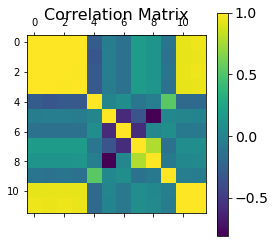

,high,low,open,close,volume,neg,neu,pos,compound,Daily References,SMA_25,EMA_25
high,1.000000,0.996949,0.996863,0.996961,-0.276895,-0.042019,-0.126492,0.189367,0.129281,-0.103537,0.936324,0.952073
low,0.996949,1.000000,0.996677,0.997305,-0.326932,-0.036586,-0.133839,0.192382,0.127408,-0.129168,0.931861,0.947937
open,0.996863,0.996677,1.000000,0.992608,-0.294002,-0.036650,-0.131532,0.189769,0.126082,-0.105902,0.937005,0.952477
close,0.996961,0.997305,0.992608,1.000000,-0.307271,-0.044799,-0.128137,0.194090,0.134294,-0.124993,0.931293,0.947203
volume,-0.276895,-0.326932,-0.294002,-0.307271,1.000000,0.011171,0.074545,-0.097774,-0.037290,0.539165,-0.183809,-0.194237
neg,-0.042019,-0.036586,-0.036650,-0.044799,0.011171,1.000000,-0.583695,-0.335461,-0.809315,0.034160,0.010640,0.005189
neu,-0.126492,-0.133839,-0.131532,-0.128137,0.074545,-0.583695,1.000000,-0.569115,0.029447,0.081979,-0.076466,-0.080010
pos,0.189367,0.192382,0.189769,0.194090,-0.097774,-0.335461,-0.569115,1.000000,0.785425,-0.129668,0.078193,0.087749
compound,0.129281,0.127408,0.126082,0.134294,-0.037290,-0.809315,0.029447,0.785425,1.000000,-0.077529,0.033565,0.043404
Daily References,-0.103537,-0.129168,-0.105902,-0.124993,0.539165,0.034160,0.081979,-0.129668,-0.077529,1.000000,-0.032828,-0.044272


In [31]:
plt.matshow(FB.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()
FB.corr()

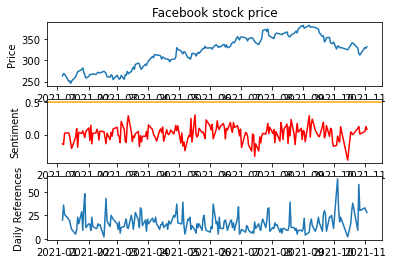

In [32]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(3)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(FB['close'])
ax2.set_ylabel('Sentiment')
ax2.plot(FB['compound'], color='red')
ax2.axhline(y=0.5, color='orange')
ax3.set_ylabel('Daily References')
ax3.plot(FB['Daily References'])


ax1.set_title('Facebook stock price')
plt.show()